## Objective
The goal of this analysis is to explore factors affecting life expectancy across countries,
perform data cleaning and preprocessing, and prepare the dataset for machine learning modeling.

#### Step1 : import necessary library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

#### Step2 read dataset

In [3]:
df = pd.read_csv("Life_Expectancy_Data.csv")

In [4]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
df.tail()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.0,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.0,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.0,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.0,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.0,79.0,1483,...,78.0,7.10,78.0,43.5,547.358878,12222251.0,11.0,11.2,0.434,9.8


#### Step3 - Sanity check of data

In [6]:
# shape
df.shape

(2938, 22)

In [7]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [8]:
df.describe

<bound method NDFrame.describe of           Country  Year      Status  Life expectancy   Adult Mortality  \
0     Afghanistan  2015  Developing              65.0            263.0   
1     Afghanistan  2014  Developing              59.9            271.0   
2     Afghanistan  2013  Developing              59.9            268.0   
3     Afghanistan  2012  Developing              59.5            272.0   
4     Afghanistan  2011  Developing              59.2            275.0   
...           ...   ...         ...               ...              ...   
2933     Zimbabwe  2004  Developing              44.3            723.0   
2934     Zimbabwe  2003  Developing              44.5            715.0   
2935     Zimbabwe  2002  Developing              44.8             73.0   
2936     Zimbabwe  2001  Developing              45.3            686.0   
2937     Zimbabwe  2000  Developing              46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   

In [9]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [11]:
df.isnull().sum()/df.shape[0]*100 
# more than 15 % value delete column

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.340368
Adult Mortality                     0.340368
infant deaths                       0.000000
Alcohol                             6.603131
percentage expenditure              0.000000
Hepatitis B                        18.822328
Measles                             0.000000
 BMI                                1.157250
under-five deaths                   0.000000
Polio                               0.646698
Total expenditure                   7.692308
Diphtheria                          0.646698
 HIV/AIDS                           0.000000
GDP                                15.248468
Population                         22.191967
 thinness  1-19 years               1.157250
 thinness 5-9 years                 1.157250
Income composition of resources     5.684139
Schooling                           5.547992
dtype: flo

In [12]:
# finding duplicate : duplicat row in data frame
df.duplicated().sum()

np.int64(0)

In [ ]:
df.select_dtypes(include='object') # return object columns
df.select_dtypes(include='object').columns # return object columns name
col = df.select_dtypes(include='object').columns[0] # print first column name
df[col].value_counts() # print specfic columnns value count
# value_counts() return each type of data freaquency

In [11]:
# identify garbase columns
# if int column contain object then it garbage
for i in df.select_dtypes(include='object').columns:
    print(df[i].value_counts())
    print("*****"*5)

Country
Afghanistan              16
Albania                  16
Algeria                  16
Angola                   16
Antigua and Barbuda      16
                         ..
Monaco                    1
Marshall Islands          1
Saint Kitts and Nevis     1
San Marino                1
Tuvalu                    1
Name: count, Length: 193, dtype: int64
*************************
Status
Developing    2426
Developed      512
Name: count, dtype: int64
*************************


### Observations
- Country and Status columns are categorical
- Status has limited categories (Developed, Developing)
- These features may require encoding before modeling


#### Step4: Exploratory data Analysis (EDA)

In [13]:
# descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2938.0,2.007519e+03,4.613841e+00,2000.00000,2004.000000,2.008000e+03,2.012000e+03,2.015000e+03
Life expectancy,2928.0,6.922493e+01,9.523867e+00,36.30000,63.100000,7.210000e+01,7.570000e+01,8.900000e+01
Adult Mortality,2928.0,1.647964e+02,1.242921e+02,1.00000,74.000000,1.440000e+02,2.280000e+02,7.230000e+02
infant deaths,2938.0,3.030395e+01,1.179265e+02,0.00000,0.000000,3.000000e+00,2.200000e+01,1.800000e+03
Alcohol,2744.0,4.602861e+00,4.052413e+00,0.01000,0.877500,3.755000e+00,7.702500e+00,1.787000e+01
percentage expenditure,2938.0,7.382513e+02,1.987915e+03,0.00000,4.685343,6.491291e+01,4.415341e+02,1.947991e+04
Hepatitis B,2385.0,8.094046e+01,2.507002e+01,1.00000,77.000000,9.200000e+01,9.700000e+01,9.900000e+01
Measles,2938.0,2.419592e+03,1.146727e+04,0.00000,0.000000,1.700000e+01,3.602500e+02,2.121830e+05
BMI,2904.0,3.832125e+01,2.004403e+01,1.00000,19.300000,4.350000e+01,5.620000e+01,8.730000e+01
under-five deaths,2938.0,4.203574e+01,1.604455e+02,0.00000,0.000000,4.000000e+00,2.800000e+01,2.500000e+03


In [14]:
df.describe(include='object')  # return object columns describe

,Country,Status
count,2938,2938
unique,193,2
top,Afghanistan,Developing
freq,16,2426


In [20]:
df.select_dtypes(include='number').columns
# print all columns name

Index(['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

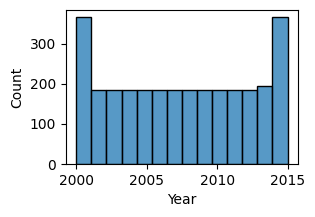

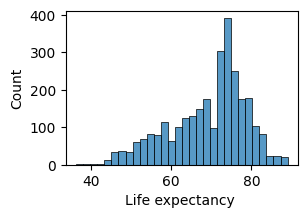

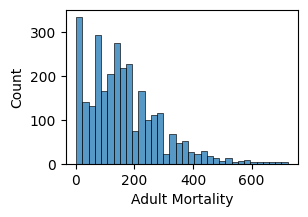

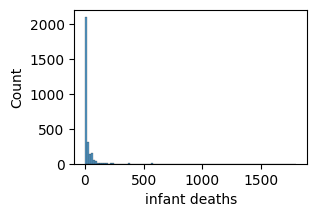

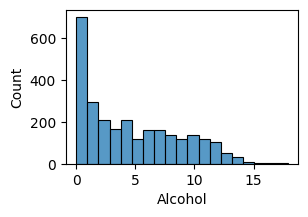

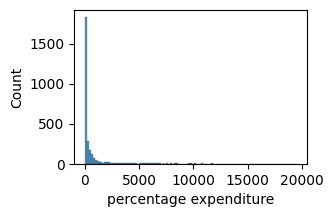

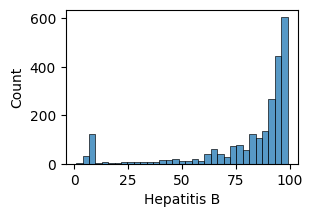

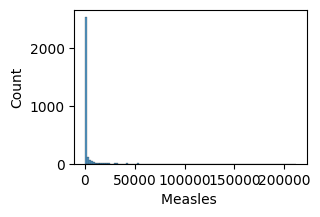

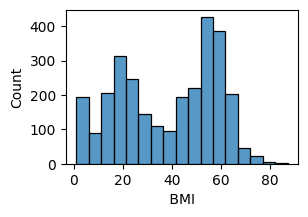

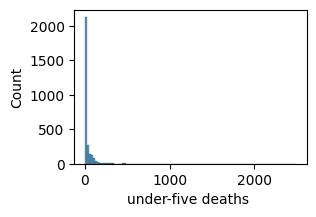

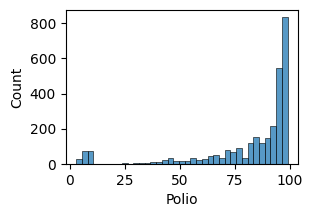

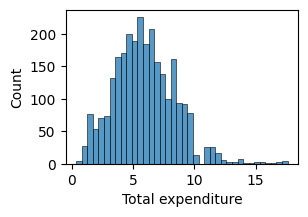

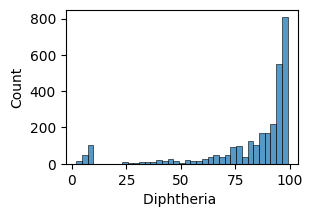

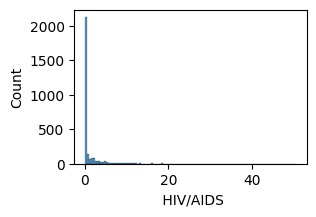

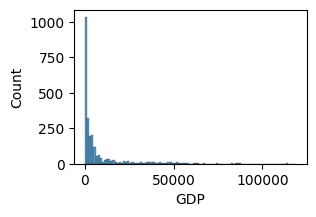

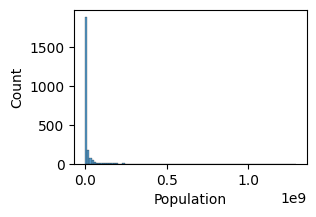

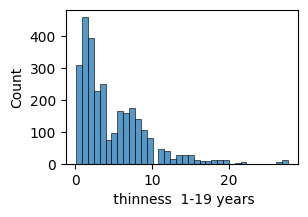

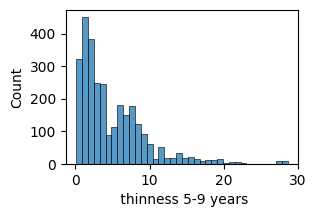

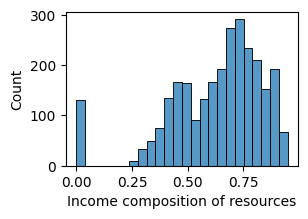

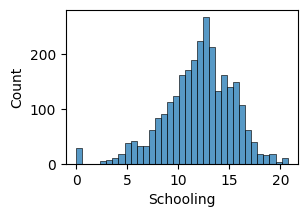

In [ ]:
# histogram to understand the distribution
for i in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(3, 2))
    sns.histplot(data=df, x=i)
    plt.show()

#  sns.histplot(data=df, x=columnName) => print histplot

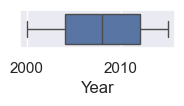

<Figure size 400x200 with 0 Axes>

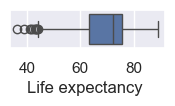

<Figure size 400x200 with 0 Axes>

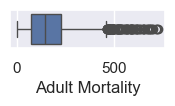

<Figure size 400x200 with 0 Axes>

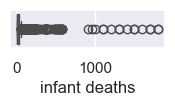

<Figure size 400x200 with 0 Axes>

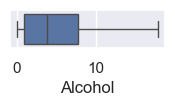

<Figure size 400x200 with 0 Axes>

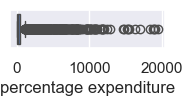

<Figure size 400x200 with 0 Axes>

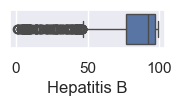

<Figure size 400x200 with 0 Axes>

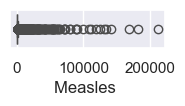

<Figure size 400x200 with 0 Axes>

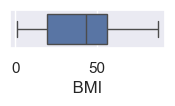

<Figure size 400x200 with 0 Axes>

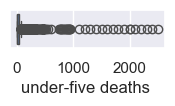

<Figure size 400x200 with 0 Axes>

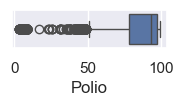

<Figure size 400x200 with 0 Axes>

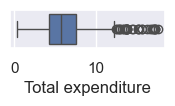

<Figure size 400x200 with 0 Axes>

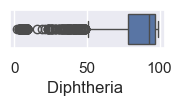

<Figure size 400x200 with 0 Axes>

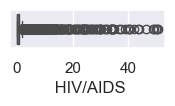

<Figure size 400x200 with 0 Axes>

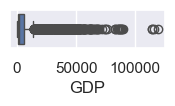

<Figure size 400x200 with 0 Axes>

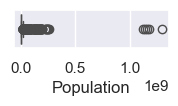

<Figure size 400x200 with 0 Axes>

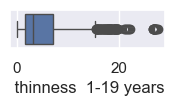

<Figure size 400x200 with 0 Axes>

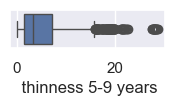

<Figure size 400x200 with 0 Axes>

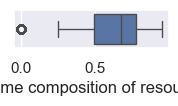

<Figure size 400x200 with 0 Axes>

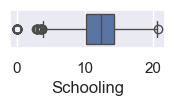

<Figure size 400x200 with 0 Axes>

In [ ]:
# boxplot to identify outliers
sns.set_theme(rc={'figure.figsize':(2, 0.5)})
for col in df.select_dtypes(include='number').columns:
    sns.boxplot(data=df, x=col)
    plt.figure(figsize=(4, 2))
    plt.show()

# sns.boxplot(data=df, x=columnName) => help to identify outliers


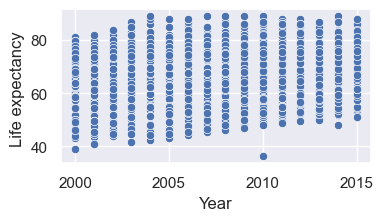

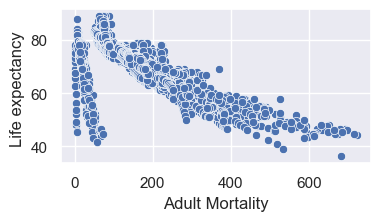

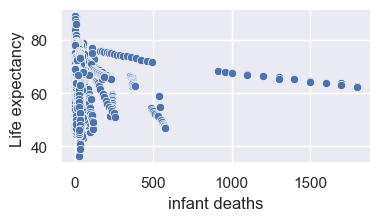

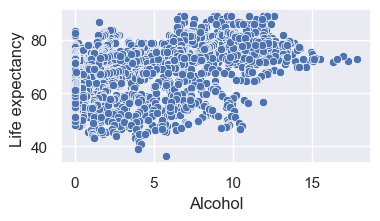

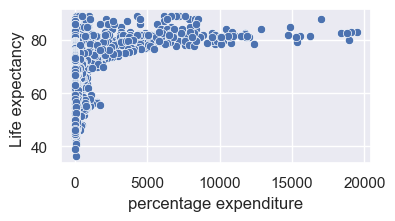

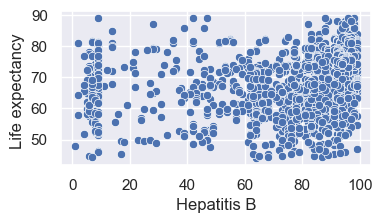

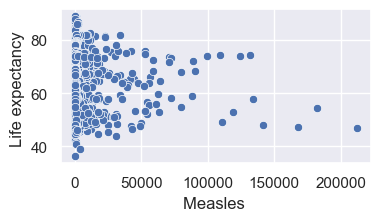

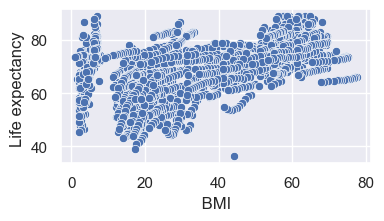

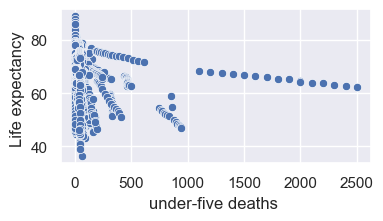

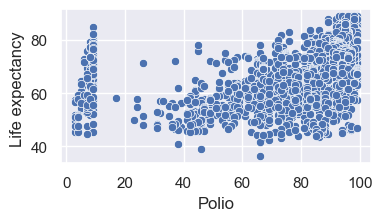

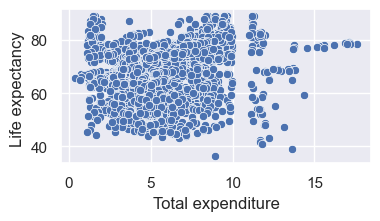

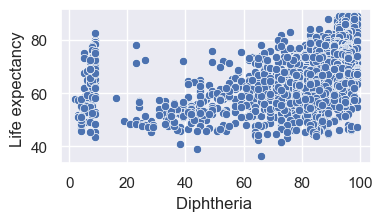

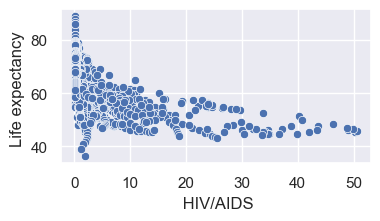

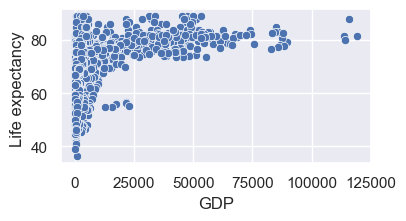

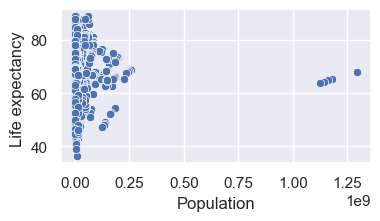

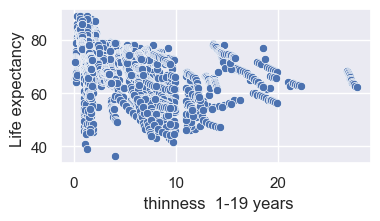

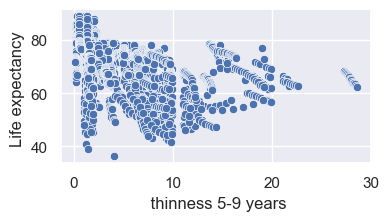

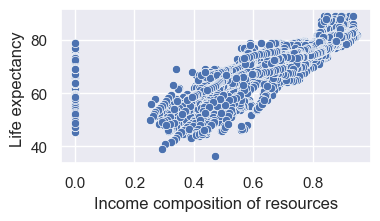

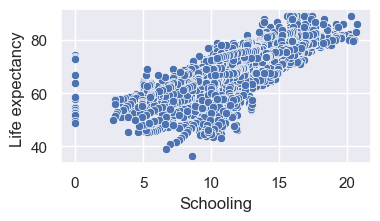

In [19]:
# scatter plot to understand the relationsip
for i in ['Year', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling']:
      plt.figure(figsize=(4, 2))
      sns.scatterplot(data=df, x=i, y='Life expectancy ')
      plt.show()

#  understand the relation b/w two columns ->
# sns.scatterplot(data=df, x='oneColumn', y='secondColumn') 

In [21]:
# coreelation map
df.select_dtypes(include='number').corr()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.170033,-0.079052,-0.037415,-0.052990,0.031400,0.104333,-0.082493,0.108974,-0.042937,0.094158,0.090740,0.134337,-0.139741,0.101620,0.016969,-0.047876,-0.050929,0.243468,0.209400
Life expectancy,0.170033,1.000000,-0.696359,-0.196557,0.404877,0.381864,0.256762,-0.157586,0.567694,-0.222529,0.465556,0.218086,0.479495,-0.556556,0.461455,-0.021538,-0.477183,-0.471584,0.724776,0.751975
Adult Mortality,-0.079052,-0.696359,1.000000,0.078756,-0.195848,-0.242860,-0.162476,0.031176,-0.387017,0.094146,-0.274823,-0.115281,-0.275131,0.523821,-0.296049,-0.013647,0.302904,0.308457,-0.457626,-0.454612
infant deaths,-0.037415,-0.196557,0.078756,1.000000,-0.115638,-0.085612,-0.223566,0.501128,-0.227279,0.996629,-0.170689,-0.128616,-0.175171,0.025231,-0.108427,0.556801,0.465711,0.471350,-0.145139,-0.193720
Alcohol,-0.052990,0.404877,-0.195848,-0.115638,1.000000,0.341285,0.087549,-0.051827,0.330408,-0.112370,0.221734,0.296942,0.222020,-0.048845,0.354712,-0.035252,-0.428795,-0.417414,0.450040,0.547378
percentage expenditure,0.031400,0.381864,-0.242860,-0.085612,0.341285,1.000000,0.016274,-0.056596,0.228700,-0.087852,0.147259,0.174420,0.143624,-0.097857,0.899373,-0.025662,-0.251369,-0.252905,0.381952,0.389687
Hepatitis B,0.104333,0.256762,-0.162476,-0.223566,0.087549,0.016274,1.000000,-0.120529,0.150380,-0.233126,0.486171,0.058280,0.611495,-0.112675,0.083903,-0.123321,-0.120429,-0.124960,0.199549,0.231117
Measles,-0.082493,-0.157586,0.031176,0.501128,-0.051827,-0.056596,-0.120529,1.000000,-0.175977,0.507809,-0.136166,-0.106241,-0.141882,0.030899,-0.076466,0.265966,0.224808,0.221072,-0.129568,-0.137225
BMI,0.108974,0.567694,-0.387017,-0.227279,0.330408,0.228700,0.150380,-0.175977,1.000000,-0.237669,0.284569,0.242503,0.283147,-0.243717,0.301557,-0.072301,-0.532025,-0.538911,0.508774,0.546961
under-five deaths,-0.042937,-0.222529,0.094146,0.996629,-0.112370,-0.087852,-0.233126,0.507809,-0.237669,1.000000,-0.188720,-0.130148,-0.195668,0.038062,-0.112081,0.544423,0.467789,0.472263,-0.163305,-0.209373


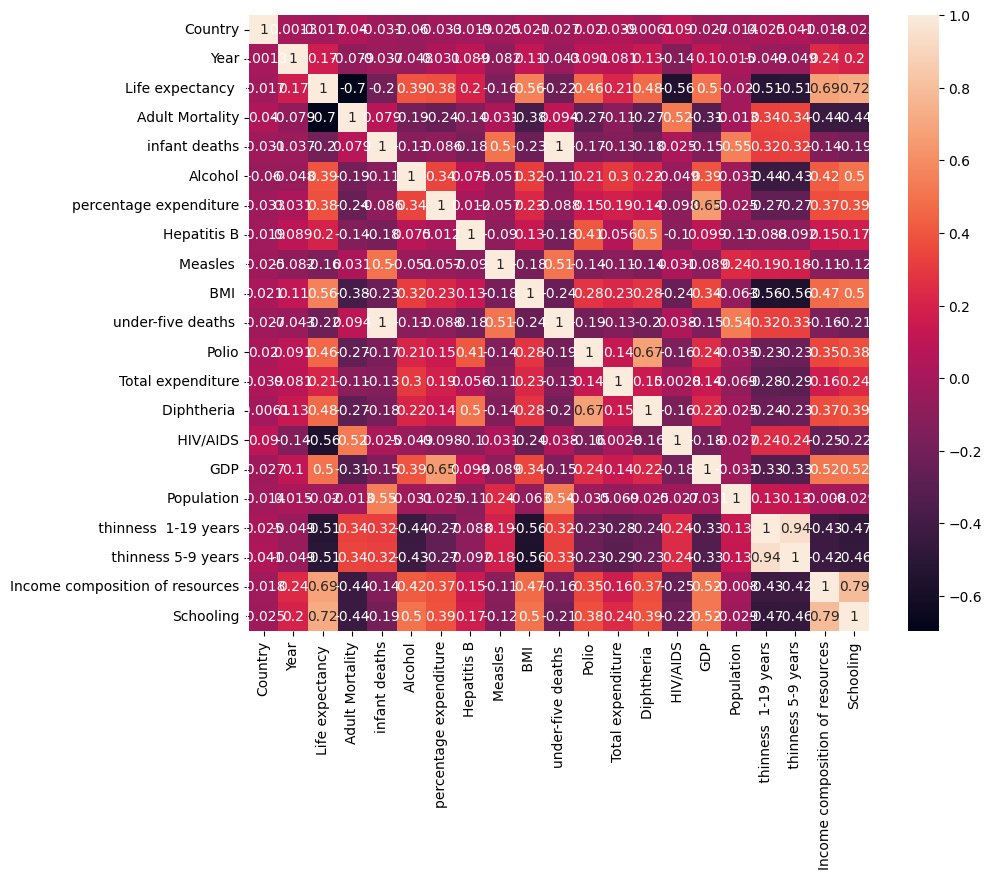

In [ ]:
# heatmap to select show relation between two another
s = df.select_dtypes(include='number').corr()
plt.figure(figsize=(10, 8))
sns.heatmap(s, annot=True)
plt.show()

# show relation b/w one two another columns (how much correlated)
# sns.heatmap(correlation_of_dataframe, another=True)

In [ ]:
# step 4 : Exploratory data analysis(EDA)

# understand the distribution -> sns.histplot(data=df, x=columnName)
# identify outliers -> sns.boxplot(data=df, x=columnName)
# understand the relation b/w two columns -> sns.scatterplot(data=df, x='oneColumn', y='secondColumn')
# show relation b/w one two another columns -> sns.heatmap(correlation_of_dataframe, another=True)

#### Step 5 - Missing value tratments
- choose the method of imputting missing value
- like mean (for continue data), median , mode (for categorical data) or KNNIputer

In [22]:
# find the null value present in each column
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

- fill null value using median (for categorical data)

In [24]:
# fill numerical data useing its median
for i in [" BMI ", "Polio", "Income composition of resources"]:
    df[i] = df[i].fillna(df[i].median())

df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                 0
under-five deaths                    0
Polio                                0
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources      0
Schooling                          163
dtype: int64

- Fill null using KNNImputer

In [25]:
# fill the categorical data
from sklearn.impute import KNNImputer 
impute = KNNImputer() # intialize KNNImputer
# KNNI compute the neareast value average

for i in df.select_dtypes(include='number').columns:
    df[i] = impute.fit_transform(df[[i]])
df.isnull().sum()
# all missing value trated

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

#### Step-6 Outliers treatments

In [26]:
# decide whether to do outliers treatment or not if do. then how?
# continueos numerical data
# target value, categorical data, descrite value
# .@@.|-----[]-----|.@@. lower limit , upper limit
# we replace out of bound (outlier) by limit

# find lower and uppper wisker( bound)
def wisker(col):
    q1, q3 = np.percentile(col,[25, 75])
    iqr = q3-q1
    lw = q1-1.5*iqr
    uw = q3+1.5*iqr
    return lw, uw

wisker(df['GDP'])

(np.float64(-9773.52021495771), np.float64(17837.165679596183))

- remove outlier by replace by upper and lower limit

In [27]:
for i in ["GDP", "Total expenditure", ' thinness  1-19 years', ' thinness 5-9 years']:
    lw,uw = wisker(df[i])
    df[i] = np.where(df[i]<lw, lw, df[i])
    df[i] = np.where(df[i] > uw, uw, df[i])


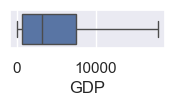

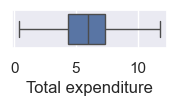

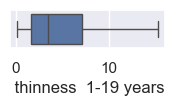

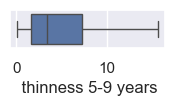

In [28]:
for i in ["GDP", "Total expenditure", ' thinness  1-19 years', ' thinness 5-9 years']:
    sns.boxplot(data=df, x=i)
    plt.show()

# check box plot all outlier are remove


#### Step-7 duplicates & garbage value treatments

In [29]:
# check for duplicate if we have any unique column in the data set, delete them 
df.duplicated().sum()
df.drop_duplicates()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015.0,Developing,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,15.35,15.6,0.479,10.1
1,Afghanistan,2014.0,Developing,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,...,58.0,8.18,62.0,0.1,612.696514,327582.0,15.35,15.6,0.476,10.0
2,Afghanistan,2013.0,Developing,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,15.35,15.6,0.470,9.9
3,Afghanistan,2012.0,Developing,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,15.35,15.6,0.463,9.8
4,Afghanistan,2011.0,Developing,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,15.35,15.6,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004.0,Developing,44.3,723.0,27.0,4.36,0.000000,68.0,31.0,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.40,9.4,0.407,9.2
2934,Zimbabwe,2003.0,Developing,44.5,715.0,26.0,4.06,0.000000,7.0,998.0,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.80,9.9,0.418,9.5
2935,Zimbabwe,2002.0,Developing,44.8,73.0,25.0,4.43,0.000000,73.0,304.0,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.20,1.3,0.427,10.0
2936,Zimbabwe,2001.0,Developing,45.3,686.0,25.0,1.72,0.000000,76.0,529.0,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.60,1.7,0.427,9.8


In [30]:
# check for garbage value in data
# change thorugh mean mode of data.
for i in df.select_dtypes(include='object').columns:
    print(df[i].value_counts())
    print("*****"*5)

Country
Afghanistan              16
Albania                  16
Algeria                  16
Angola                   16
Antigua and Barbuda      16
                         ..
Monaco                    1
Marshall Islands          1
Saint Kitts and Nevis     1
San Marino                1
Tuvalu                    1
Name: count, Length: 193, dtype: int64
*************************
Status
Developing    2426
Developed      512
Name: count, dtype: int64
*************************


#### Step:8 Categorical Variable Encoding.

- convert (object data) into (numerical) called encoding
- encoding done by-> 1. one-hot-encoding, 2. label-encoding

In [51]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder;

##### 1. one-hot-encoding 
- create each unique value and mark true if match else false
- create dummies using pandas



In [ ]:
pd.get_dummies(data=df, columns=['Country', 'Status'], drop_first=True)
# drop the first level of data if any 


,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Country_United States of America,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe,Status_Developing
0,2015.0,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,19.1,83.0,...,False,False,False,False,False,False,False,False,False,True
1,2014.0,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,18.6,86.0,...,False,False,False,False,False,False,False,False,False,True
2,2013.0,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,18.1,89.0,...,False,False,False,False,False,False,False,False,False,True
3,2012.0,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,17.6,93.0,...,False,False,False,False,False,False,False,False,False,True
4,2011.0,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,17.2,97.0,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004.0,44.3,723.0,27.0,4.36,0.000000,68.0,31.0,27.1,42.0,...,False,False,False,False,False,False,False,False,True,True
2934,2003.0,44.5,715.0,26.0,4.06,0.000000,7.0,998.0,26.7,41.0,...,False,False,False,False,False,False,False,False,True,True
2935,2002.0,44.8,73.0,25.0,4.43,0.000000,73.0,304.0,26.3,40.0,...,False,False,False,False,False,False,False,False,True,True
2936,2001.0,45.3,686.0,25.0,1.72,0.000000,76.0,529.0,25.9,39.0,...,False,False,False,False,False,False,False,False,True,True


- one-hot-encodeing : 
- column transfermer and convert array -> dataframe

In [34]:
# one-hot-encodeing :  convert array -> dataframe
ohe = OneHotEncoder()
data = df[[ 'Status']]
encoded = ohe.fit_transform(data).toarray()  #.astype(int)
dfa = pd.DataFrame(encoded, columns=ohe.get_feature_names_out() )
dfa.head()

,Status_Developed,Status_Developing
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


##### 2. Label-Encoding

- each unique data give label data(number)
- using replace with original data

In [67]:
le = LabelEncoder() # function intialization
df['Country'] = le.fit_transform(df['Country'])
df['Status'] = le.fit_transform(df['Status']);
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Stauts
0,0,2015.0,1,0.544592,0.362881,62.0,0.01,71.279624,65.0,1154.0,...,8.16,65.0,0.1,584.259210,33736494.0,15.35,15.6,0.479,10.1,1.0
1,0,2014.0,1,0.447818,0.373961,64.0,0.01,73.523582,62.0,492.0,...,8.18,62.0,0.1,612.696514,327582.0,15.35,15.6,0.476,10.0,1.0
2,0,2013.0,1,0.447818,0.369806,66.0,0.01,73.219243,64.0,430.0,...,8.13,64.0,0.1,631.744976,31731688.0,15.35,15.6,0.470,9.9,1.0
3,0,2012.0,1,0.440228,0.375346,69.0,0.01,78.184215,67.0,2787.0,...,8.52,67.0,0.1,669.959000,3696958.0,15.35,15.6,0.463,9.8,1.0
4,0,2011.0,1,0.434535,0.379501,71.0,0.01,7.097109,68.0,3013.0,...,7.87,68.0,0.1,63.537231,2978599.0,15.35,15.6,0.454,9.5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,192,2004.0,1,0.151803,1.000000,27.0,4.36,0.000000,68.0,31.0,...,7.13,65.0,33.6,454.366654,12777511.0,9.40,9.4,0.407,9.2,1.0
2934,192,2003.0,1,0.155598,0.988920,26.0,4.06,0.000000,7.0,998.0,...,6.52,68.0,36.7,453.351155,12633897.0,9.80,9.9,0.418,9.5,1.0
2935,192,2002.0,1,0.161290,0.099723,25.0,4.43,0.000000,73.0,304.0,...,6.53,71.0,39.8,57.348340,125525.0,1.20,1.3,0.427,10.0,1.0
2936,192,2001.0,1,0.170778,0.948753,25.0,1.72,0.000000,76.0,529.0,...,6.16,75.0,42.1,548.587312,12366165.0,1.60,1.7,0.427,9.8,1.0


##### # 3. columnTransformer + OneHotEncoder

In [48]:
# 3. columnTransformer + OneHotEncoder
cols = ['Status']

ct = ColumnTransformer(
    transformers=[('ohe', OneHotEncoder(), cols)],
    remainder='passthrough' # all other will be are also part
)

arr = ct.fit_transform(df)
dfa = pd.DataFrame(arr, columns=ct.get_feature_names_out())
dfa.head()

,ohe__Status_Developed,ohe__Status_Developing,remainder__Country,remainder__Year,remainder__Life expectancy,remainder__Adult Mortality,remainder__infant deaths,remainder__Alcohol,remainder__percentage expenditure,remainder__Hepatitis B,...,remainder__Polio,remainder__Total expenditure,remainder__Diphtheria,remainder__ HIV/AIDS,remainder__GDP,remainder__Population,remainder__ thinness 1-19 years,remainder__ thinness 5-9 years,remainder__Income composition of resources,remainder__Schooling
0,0.0,1.0,0.0,2015.0,65.0,263.0,62.0,0.01,71.279624,65.0,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,15.35,15.6,0.479,10.1
1,0.0,1.0,0.0,2014.0,59.9,271.0,64.0,0.01,73.523582,62.0,...,58.0,8.18,62.0,0.1,612.696514,327582.0,15.35,15.6,0.476,10.0
2,0.0,1.0,0.0,2013.0,59.9,268.0,66.0,0.01,73.219243,64.0,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,15.35,15.6,0.470,9.9
3,0.0,1.0,0.0,2012.0,59.5,272.0,69.0,0.01,78.184215,67.0,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,15.35,15.6,0.463,9.8
4,0.0,1.0,0.0,2011.0,59.2,275.0,71.0,0.01,7.097109,68.0,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,15.35,15.6,0.454,9.5


##### 4 : ColumnTransfer + LabelEncoder
-  LabelEncoder : work only on 1d array
- OrdinalEncoder : work on 2d array also

In [ ]:
oe = OrdinalEncoder()
arr = oe.fit_transform(df[['Status']])
df[['Stauts']] = arr
df

##### 5 ColumnTransfer + LabelEncoder

In [ ]:
ct = ColumnTransformer(
    [('encoder', OrdinalEncoder(), ['Status'])],
    remainder='passthrough'
)
arr = ct.fit_transform(df)
dfa = pd.DataFrame(arr)
dfa

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,1.0,0.0,2015.0,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,15.35,15.6,0.479,10.1
1,1.0,0.0,2014.0,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,...,58.0,8.18,62.0,0.1,612.696514,327582.0,15.35,15.6,0.476,10.0
2,1.0,0.0,2013.0,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,15.35,15.6,0.470,9.9
3,1.0,0.0,2012.0,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,15.35,15.6,0.463,9.8
4,1.0,0.0,2011.0,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,15.35,15.6,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,1.0,192.0,2004.0,44.3,723.0,27.0,4.36,0.000000,68.0,31.0,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.40,9.4,0.407,9.2
2934,1.0,192.0,2003.0,44.5,715.0,26.0,4.06,0.000000,7.0,998.0,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.80,9.9,0.418,9.5
2935,1.0,192.0,2002.0,44.8,73.0,25.0,4.43,0.000000,73.0,304.0,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.20,1.3,0.427,10.0
2936,1.0,192.0,2001.0,45.3,686.0,25.0,1.72,0.000000,76.0,529.0,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.60,1.7,0.427,9.8


#### Step : 9. Feature Scaling : is process to change a feature magnitude but it's nature will be same
- why we do : model will take high value as high priority and low value has low priority which make model unbalance
- we want equal priority of large and low value 
- so change magnitude but nature will same
- Type
- 1. Standardization
- 2. Normalization (min-max)

##### 1. Standardization 
- use forumla X_new = (X_i - X_mean)/standard_deviation
- after scaling means = 0, variance and standard deviation = 1
- we calcualte by manually and also by library

In [56]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [57]:
# Standardization   # x = x-mean/std
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Life expectancy ', 'Adult Mortality']] = scaler.fit_transform(df[['Life expectancy ', 'Adult Mortality']])
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015.0,Developing,-0.444448,0.791586,62.0,0.01,71.279624,65.0,1154.0,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,15.35,15.6,0.479,10.1
1,0,2014.0,Developing,-0.980950,0.856072,64.0,0.01,73.523582,62.0,492.0,...,58.0,8.18,62.0,0.1,612.696514,327582.0,15.35,15.6,0.476,10.0
2,0,2013.0,Developing,-0.980950,0.831890,66.0,0.01,73.219243,64.0,430.0,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,15.35,15.6,0.470,9.9
3,0,2012.0,Developing,-1.023029,0.864132,69.0,0.01,78.184215,67.0,2787.0,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,15.35,15.6,0.463,9.8
4,0,2011.0,Developing,-1.054587,0.888314,71.0,0.01,7.097109,68.0,3013.0,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,15.35,15.6,0.454,9.5


##### 2. Normalization
-  X_new = (X_i - X_min)/(X_max - X_min)
-  we repalce manually : we use MinMaxScaler

In [58]:
# Normalization  # x` = (x-Xmin)/(Xmax-Xmin)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['Life expectancy ', 'Adult Mortality']] = scaler.fit_transform(df[['Life expectancy ', 'Adult Mortality']])
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015.0,Developing,0.544592,0.362881,62.0,0.01,71.279624,65.0,1154.0,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,15.35,15.6,0.479,10.1
1,0,2014.0,Developing,0.447818,0.373961,64.0,0.01,73.523582,62.0,492.0,...,58.0,8.18,62.0,0.1,612.696514,327582.0,15.35,15.6,0.476,10.0
2,0,2013.0,Developing,0.447818,0.369806,66.0,0.01,73.219243,64.0,430.0,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,15.35,15.6,0.470,9.9
3,0,2012.0,Developing,0.440228,0.375346,69.0,0.01,78.184215,67.0,2787.0,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,15.35,15.6,0.463,9.8
4,0,2011.0,Developing,0.434535,0.379501,71.0,0.01,7.097109,68.0,3013.0,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,15.35,15.6,0.454,9.5


##### 3. Robust Scalling 
- x` = (x-Xmedain)/IQR  , IQR = Q3-Q1

In [ ]:
# Robust Scalling # x` = (x-Xmedain)/IQR  , IQR = Q3-Q1
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df[["Age","Salary"]] = scaler.fit_transform(df[["Age","Salary"]])


#### Step 10 : train - test set

In [59]:
from sklearn.model_selection import train_test_split
X = [10, 12]
y = [20, 30]
# X = features, y = target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train size:", len(X_train))
print("Test size:", len(X_test))


Train size: 1
Test size: 1


1. Logistic Regression Model

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [70]:

X = df.drop("Life expectancy ", axis=1)
y = df["Life expectancy "]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((2350, 22), (588, 22))

In [71]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


#### Baseline Regression Model Result
A baseline regression model was trained to predict life expectancy.
This model serves as a reference point for future improvement.

In [72]:
y_pred = model.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred))

R2 Score: 0.8262060798140215


##### feature importance/coefficeints

In [74]:
import pandas as pd

coeff_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

coeff_df


,Feature,Coefficient
19,Income composition of resources,1.133695e-01
20,Schooling,1.216856e-02
4,infant deaths,1.808816e-03
5,Alcohol,9.321327e-04
13,Diphtheria,7.792037e-04
9,BMI,7.262127e-04
11,Polio,5.141716e-04
12,Total expenditure,4.201292e-04
1,Year,9.862649e-05
0,Country,6.411167e-05


### Feature Impact
Positive coefficients indicate features that increase life expectancy,
while negative values indicate the opposite.


#### Observation:
 Countries with higher adult mortality tend to have lower life expectancy.


## Conclusion
- Performed data cleaning and preprocessing on a real-world dataset
- Identified key features influencing life expectancy
- Built a baseline machine learning model
- This project demonstrates readiness for applied data science and ML workflows


Future Work:
- Try non-linear models like Random Forest
- Perform feature selection
- Hyperparameter tuning
